# Actividad 7 - Feature Selection

---

### Daniela Jiménez Téllez - A01654798
### Lautaro Gabriel Coteja - A01571214
### Andrés Villareal González - A00833915
### Héctor Hibran Tapia Fernández - A01661114

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization

## I) Incluir resultados de experimentos donde probaron con un set de features y el performance del modelo al ser entrenado con esos features.


In [2]:
df_entrenamiento = pd.read_csv('df_entrenamiento.csv')

In [3]:
df_prueba = pd.read_csv('df_prueba.csv')

In [4]:
df_combinado = pd.concat([df_entrenamiento, df_prueba], ignore_index = True)
df_combinado

,CustomerId,Material,successful,Material_desc_x,pc_agr_300m,pc_comercial_300m,pc_generales_300m,pc_habitacional_300m,pc_habitacional_mixta_300m,pc_industrial_300m,...,ingreso_remesas_300m,ingreso_rentas_300m,accesibilidad,industry_customer_size,sub_canal_comercial,Productos_Por_Empaque,ProductType,calmonth_x,conteo_instalaciones,categoria_instalaciones
0,499920078,14121,1,SCL LECHE CHOCOLATE 200 ML NR TPK 8,0.0,0.0,6.110,48.400,37.710,6.280,...,58.961989,1042.346117,0.184550,3,Estanquillos / kioscos,8,LECHE UHT SABORIZADA,2020-05-01,5.0,Medio
1,499920078,14122,1,COCA COLA 1.5 L RET PET 12B ETIQ,0.0,0.0,6.110,48.400,37.710,6.280,...,58.961989,1042.346117,0.184550,3,Estanquillos / kioscos,12,COLAS REGULAR,2020-04-01,5.0,Medio
2,499920078,14146,1,COCA COLA 235 ML RT VIDRIO 24B,0.0,0.0,6.110,48.400,37.710,6.280,...,58.961989,1042.346117,0.184550,3,Estanquillos / kioscos,24,COLAS REGULAR,2020-09-01,5.0,Medio
3,499920078,14181,1,MONSTER ENERGY ORI 473ML NR LAT 2 REFO,0.0,0.0,6.110,48.400,37.710,6.280,...,58.961989,1042.346117,0.184550,3,Estanquillos / kioscos,2,BEBIDAS ENERGETICAS,2020-12-01,5.0,Medio
4,499920078,14317,1,COCA-COLA 250 ML NR PET 12,0.0,0.0,6.110,48.400,37.710,6.280,...,58.961989,1042.346117,0.184550,3,Estanquillos / kioscos,12,COLAS REGULAR,2021-10-01,5.0,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33179,510779278,14160,0,MONSTER ENERGY ORIGINAL 473ML LATA 4B RE,0.0,0.0,0.000,92.346,0.000,7.654,...,0.000000,762.883390,0.414336,1,Hogar con Venta,4,BEBIDAS ENERGETICAS,2022-12-01,0.4,Pocas
33180,510779278,14367,0,DV 100% JU MANZANA 200 ML NR TPK 4,0.0,0.0,0.000,92.346,0.000,7.654,...,0.000000,762.883390,0.414336,1,Hogar con Venta,4,JUGOS Y NECTARES,2022-10-01,0.4,Pocas
33181,510779281,14314,0,SIDRAL MUN MZA-DZO 600 ML NR PET 6,0.0,0.0,2.905,42.178,51.964,2.710,...,128.601329,774.146556,0.158855,1,Cerveza y Licores,6,SABORES REGULAR,2022-08-01,4.6,Medio
33182,510779281,14546,0,MONSTER E ULTRA PARADISE 473ML NR LAT 4B,0.0,0.0,2.905,42.178,51.964,2.710,...,128.601329,774.146556,0.158855,1,Cerveza y Licores,4,BEBIDAS ENERGETICAS,2022-09-01,4.6,Medio


In [5]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33184 entries, 0 to 33183
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerId                  33184 non-null  int64  
 1   Material                    33184 non-null  int64  
 2   successful                  33184 non-null  int64  
 3   Material_desc_x             33184 non-null  object 
 4   pc_agr_300m                 33184 non-null  float64
 5   pc_comercial_300m           33184 non-null  float64
 6   pc_generales_300m           33184 non-null  float64
 7   pc_habitacional_300m        33184 non-null  float64
 8   pc_habitacional_mixta_300m  33184 non-null  float64
 9   pc_industrial_300m          33184 non-null  float64
 10  pc_minero_300m              33184 non-null  float64
 11  pc_mixta_300m               33184 non-null  float64
 12  pc_negocios_300m            33184 non-null  float64
 13  pc_turismo_300m             331

In [6]:
df = df_combinado.copy()

df['calmonth_x'] = pd.to_datetime(df['calmonth_x'], errors = 'coerce') # Convertir 'calmonth_x' a tipo fecha
df['month'] = df['calmonth_x'].dt.month # Extraemos el mes como característica

X = df.drop(['successful', 'calmonth_x', 'Material_desc_x', 'CustomerId', 'Material', 'Productos_Por_Empaque'], axis = 1)
y = df['successful']

X = pd.get_dummies(X, columns = ['sub_canal_comercial', 'ProductType', 'categoria_instalaciones'], drop_first = True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

model = Sequential()

# Capa de entrada
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capas ocultas
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))  # Usamos sigmoide para una salida binaria sucessful or not sucessful

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test), verbose = 1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6250 - loss: 0.7780 - val_accuracy: 0.7879 - val_loss: 0.4876
Epoch 2/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7699 - loss: 0.5279 - val_accuracy: 0.7981 - val_loss: 0.4687
Epoch 3/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7810 - loss: 0.4973 - val_accuracy: 0.7978 - val_loss: 0.4612
Epoch 4/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7861 - loss: 0.4811 - val_accuracy: 0.7990 - val_loss: 0.4560
Epoch 5/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7895 - loss: 0.4694 - val_accuracy: 0.8031 - val_loss: 0.4530
Epoch 6/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7867 - loss: 0.4700 - val_accuracy: 0.8029 - val_loss: 0.4504
Epoch 7/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7949 - loss: 0.4602 - val_accuracy: 0.8028 - val_loss: 0.4495
Epoch 8/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7850 - loss: 0.4712 - val_accuracy:

In [7]:
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)

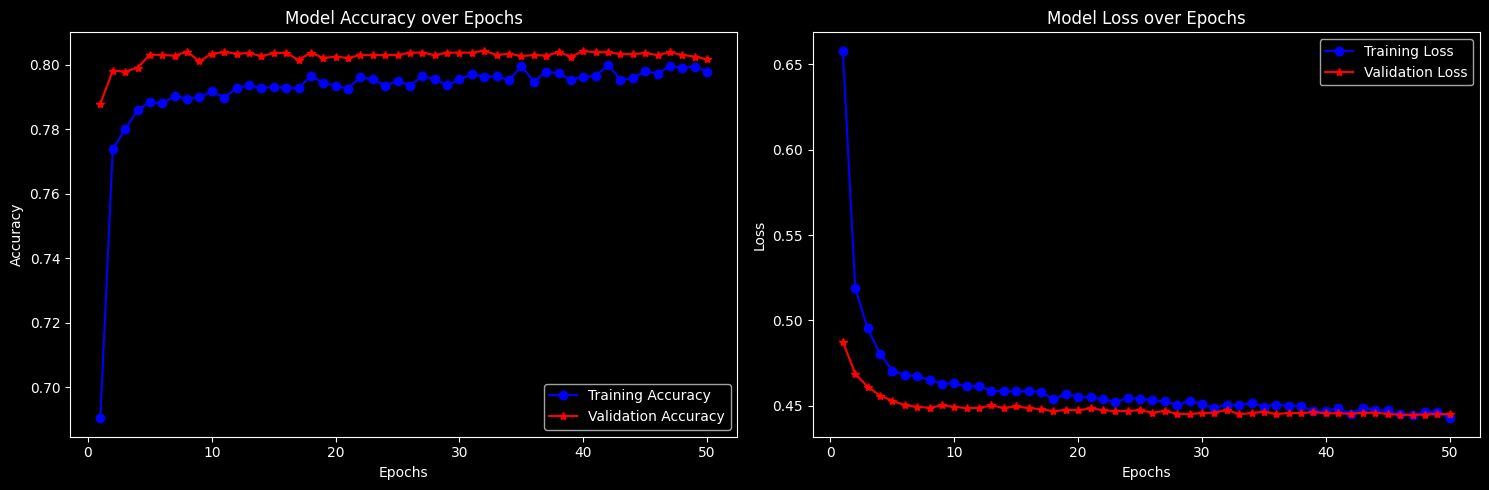

In [8]:
plt.style.use('dark_background')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
ax1.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
ax1.set_title('Model Accuracy over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo-', label='Training Loss')
ax2.plot(epochs, val_loss, 'r*-', label='Validation Loss')
ax2.set_title('Model Loss over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [9]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
num_muestras = min(500, len(y_test_array))

# for i in range(num_muestras):
#     print(f"Predicción {y_pred[i]} Valor Real {y_test_array[i]}")

predicciones_correctas = sum(y_pred[:num_muestras] == y_test_array[:num_muestras])
print(f"\nPredicciones Correctas: {predicciones_correctas} / {num_muestras}")

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Predicciones Correctas: 416 / 500


In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predicted_classes = (y_pred_prob > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, predicted_classes)
print(f"\nModel Accuracy on Test Data: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes, target_names = ['Not Successful', 'Successful']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))


Model Accuracy on Test Data: 0.80

Classification Report:
                precision    recall  f1-score   support

Not Successful       0.82      0.95      0.88      5078
    Successful       0.67      0.31      0.42      1559

      accuracy                           0.80      6637
     macro avg       0.74      0.63      0.65      6637
  weighted avg       0.78      0.80      0.77      6637

Confusion Matrix:
[[4834  244]
 [1073  486]]


In [11]:
df_combinado['ProductType'].unique()

array(['LECHE UHT SABORIZADA', 'COLAS REGULAR', 'BEBIDAS ENERGETICAS',
       'AGUA PURIFICADA', 'AGUA MINERAL', 'COLAS LIGHT',
       'BEBIDA ALCOHOLICA', 'SABORES REGULAR', 'BEBIDAS DE SOYA',
       'JUGOS Y NECTARES', 'NARANJADAS', 'LECHE UHT REGULAR', 'MIXTOS',
       'CAFE MOLIDO', 'LECHE UHT ESPECIALIZADA', 'AGUA SABORIZADA', 'TE',
       'CAFE GRANO', 'SABORES LIGHT', 'ISOTONICOS',
       'BEBIDAS REFRESCANTES'], dtype=object)

In [12]:
product_type = input("Por favor, ingrese el ProductType deseado: ")
df_filtered = df[df['ProductType'] == product_type]
X_filtered = df_filtered.drop(['successful', 'calmonth_x', 'Material_desc_x', 'CustomerId', 'Material'], axis=1)
X_filtered = pd.get_dummies(X_filtered, columns=['sub_canal_comercial', 'ProductType', 'categoria_instalaciones'], drop_first=True)
missing_cols = list(set(X.columns) - set(X_filtered.columns))
X_filtered = pd.concat([X_filtered, pd.DataFrame(0, index=X_filtered.index, columns=missing_cols)], axis=1)
X_filtered = X_filtered[X.columns]
X_filtered_scaled = scaler.transform(X_filtered)
probs = model.predict(X_filtered_scaled)
resultados = pd.DataFrame({'CustomerId': df_filtered['CustomerId'], 'Probabilidad_Exito': probs.flatten()})
print(resultados.shape)
resultados = resultados.sort_values(by='Probabilidad_Exito', ascending=False)
resultados.head(30)

Por favor, ingrese el ProductType deseado: COLAS REGULAR
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(3664, 2)


,CustomerId,Probabilidad_Exito
4789,500418452,0.554670
4800,500418452,0.554670
4796,500418452,0.537033
401,499972368,0.521769
4442,500399465,0.509116
1856,500102422,0.501622
421,499972924,0.500364
5472,510079613,0.494051
410,499972368,0.489889
423,499972924,0.489722


## II) Comparar estos resultados con experimentos utilizando otro set de features.

Aplicando Decision Trees para obtener la importancia de cada feature, procedemos a dropear las últimas 3 que no sean importantes, según el siguiente código.

In [13]:
df = df_combinado.copy()
df_preprocessed = df.drop(columns=['CustomerId', 'Material', 'Material_desc_x','ProductType', 'calmonth_x', 'sub_canal_comercial', 'categoria_instalaciones'])
#df_preprocessed = pd.get_dummies(df_preprocessed, columns=[], drop_first=True)
X = df_preprocessed.drop(columns=['successful'])
y = df_preprocessed['successful']

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X, y)

feature_importances_transformed = pd.DataFrame({'feature': X.columns,'importance': tree_clf.feature_importances_}).sort_values(by='importance', ascending=False)

In [14]:
feature_importances_transformed

,feature,importance
36,Productos_Por_Empaque,0.223125
32,ingreso_remesas_300m,0.057627
34,accesibilidad,0.056081
33,ingreso_rentas_300m,0.047290
10,Peso_manza,0.045444
16,pob_d_300m,0.040271
35,industry_customer_size,0.032826
14,pob_cmen_300m,0.032739
31,ingreso_maximo_300m,0.032226
3,pc_habitacional_300m,0.030734


In [15]:
df = df_combinado.copy()

df['calmonth_x'] = pd.to_datetime(df['calmonth_x'], errors = 'coerce') # Convertir 'calmonth_x' a tipo fecha
df['month'] = df['calmonth_x'].dt.month # Extraemos el mes como característica

X = df.drop(['successful', 'calmonth_x', 'Material_desc_x', 'CustomerId', 'Material', 'pc_negocios_300m', 'pc_minero_300m', 'pc_agr_300m'], axis = 1)
y = df['successful']

X = pd.get_dummies(X, columns = ['sub_canal_comercial', 'ProductType', 'categoria_instalaciones'], drop_first = True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

model = Sequential()

# Capa de entrada
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capas ocultas
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))  # Usamos sigmoide para una salida binaria sucessful or not sucessful

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test), verbose = 1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6009 - loss: 0.7746 - val_accuracy: 0.7835 - val_loss: 0.5110
Epoch 2/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7672 - loss: 0.5286 - val_accuracy: 0.7989 - val_loss: 0.4740
Epoch 3/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7773 - loss: 0.4993 - val_accuracy: 0.8017 - val_loss: 0.4627
Epoch 4/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7795 - loss: 0.4849 - val_accuracy: 0.8001 - val_loss: 0.4600
Epoch 5/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7827 - loss: 0.4734 - val_accuracy: 0.8019 - val_loss: 0.4558
Epoch 6/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7788 - loss: 0.4758 - val_accuracy: 0.8002 - val_loss: 0.4562
Epoch 7/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7831 - loss: 0.4732 - val_accuracy: 0.8017 - val_loss: 0.4537
Epoch 8/50
830/830 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7841 - loss: 0.4690 - val_accuracy: 0.

In [16]:
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)

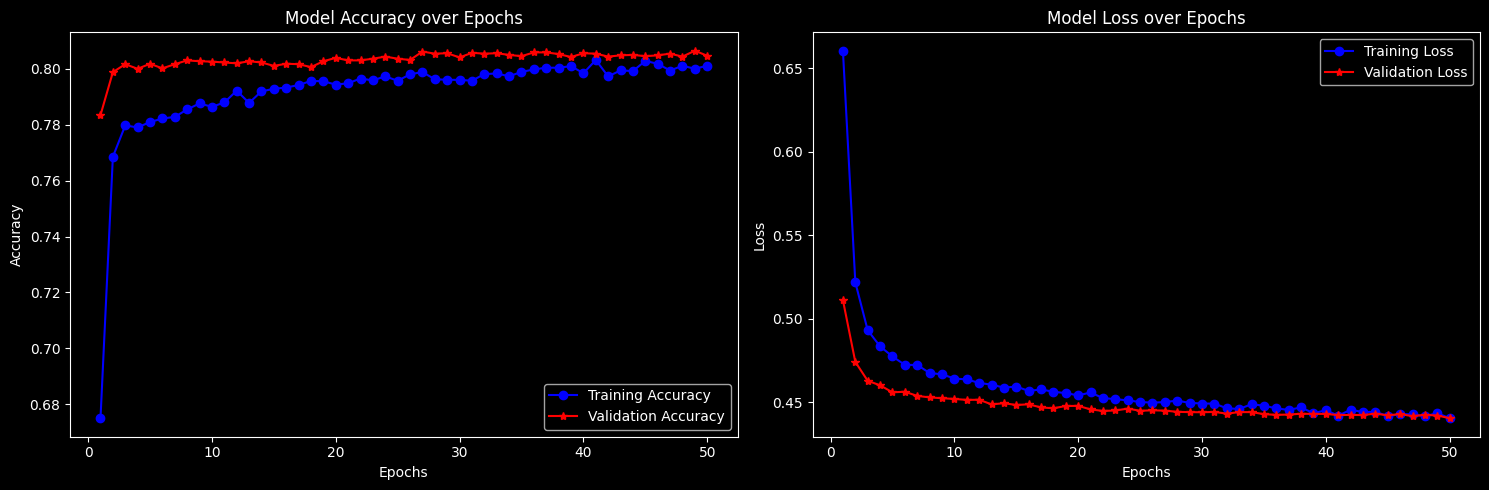

In [17]:
plt.style.use('dark_background')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
ax1.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
ax1.set_title('Model Accuracy over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo-', label='Training Loss')
ax2.plot(epochs, val_loss, 'r*-', label='Validation Loss')
ax2.set_title('Model Loss over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [18]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
num_muestras = min(500, len(y_test_array))

# for i in range(num_muestras):
#     print(f"Predicción {y_pred[i]} Valor Real {y_test_array[i]}")

predicciones_correctas = sum(y_pred[:num_muestras] == y_test_array[:num_muestras])
print(f"\nPredicciones Correctas: {predicciones_correctas} / {num_muestras}")

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Predicciones Correctas: 415 / 500


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predicted_classes = (y_pred_prob > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, predicted_classes)
print(f"\nModel Accuracy on Test Data: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predicted_classes, target_names = ['Not Successful', 'Successful']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))


Model Accuracy on Test Data: 0.80

Classification Report:
                precision    recall  f1-score   support

Not Successful       0.82      0.95      0.88      5078
    Successful       0.67      0.33      0.44      1559

      accuracy                           0.80      6637
     macro avg       0.75      0.64      0.66      6637
  weighted avg       0.79      0.80      0.78      6637

Confusion Matrix:
[[4826  252]
 [1044  515]]


In [20]:
df_combinado['ProductType'].unique()

array(['LECHE UHT SABORIZADA', 'COLAS REGULAR', 'BEBIDAS ENERGETICAS',
       'AGUA PURIFICADA', 'AGUA MINERAL', 'COLAS LIGHT',
       'BEBIDA ALCOHOLICA', 'SABORES REGULAR', 'BEBIDAS DE SOYA',
       'JUGOS Y NECTARES', 'NARANJADAS', 'LECHE UHT REGULAR', 'MIXTOS',
       'CAFE MOLIDO', 'LECHE UHT ESPECIALIZADA', 'AGUA SABORIZADA', 'TE',
       'CAFE GRANO', 'SABORES LIGHT', 'ISOTONICOS',
       'BEBIDAS REFRESCANTES'], dtype=object)

In [21]:
product_type = input("Por favor, ingrese el ProductType deseado: ")
df_filtered = df[df['ProductType'] == product_type]
X_filtered = df_filtered.drop(['successful', 'calmonth_x', 'Material_desc_x', 'CustomerId', 'Material'], axis=1)
X_filtered = pd.get_dummies(X_filtered, columns=['sub_canal_comercial', 'ProductType', 'categoria_instalaciones'], drop_first=True)
missing_cols = list(set(X.columns) - set(X_filtered.columns))
X_filtered = pd.concat([X_filtered, pd.DataFrame(0, index=X_filtered.index, columns=missing_cols)], axis=1)
X_filtered = X_filtered[X.columns]
X_filtered_scaled = scaler.transform(X_filtered)
probs = model.predict(X_filtered_scaled)
resultados = pd.DataFrame({'CustomerId': df_filtered['CustomerId'], 'Probabilidad_Exito': probs.flatten()})
print(resultados.shape)
resultados = resultados.sort_values(by='Probabilidad_Exito', ascending=False)
resultados.head(30)

Por favor, ingrese el ProductType deseado: COLAS REGULAR
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(3664, 2)


,CustomerId,Probabilidad_Exito
4800,500418452,0.512288
19625,500399465,0.503019
13819,500163539,0.493022
4796,500418452,0.472544
2765,500190103,0.469544
3316,500285814,0.465652
4755,500417619,0.463514
1520,500058196,0.450471
6120,510341080,0.447608
4789,500418452,0.441710
